<a href="https://colab.research.google.com/github/HernandoMV/filled-in-line-plot/blob/main/filled-in-line-plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# read the file
file_path = "HeLa AAV8.csv"
data = pd.read_csv(file_path, header=None, index_col=None).T

In [33]:
# add columns
column_names = data.iloc[0][:].values.tolist()
column_names[0] = 'MOI'
data.columns = column_names
# remove first row
data = data.iloc[1:,:]

In [34]:
# restructure the dataframe to have a single value per line
data.dropna(inplace=True)
df = data.melt(id_vars=['MOI'], value_vars=[data.columns[1], data.columns[2], data.columns[3]])
# make the value column numeric
df['value'] = pd.to_numeric(df['value'])
# set the MOI as string
df['MOI'] = df['MOI'].astype(str)

In [ ]:
# set a sns palette
color_palette = [
    (0, 256, 0),
    (256, 0, 0),
    (0, 0, 0),
    ]
# set the alpha of the standard deviation fill
alpha_of_sds = 0.1

for i in range(len(color_palette)):
    color_palette[i] = tuple([x/256 for x in color_palette[i]])
sns.set_palette(color_palette)

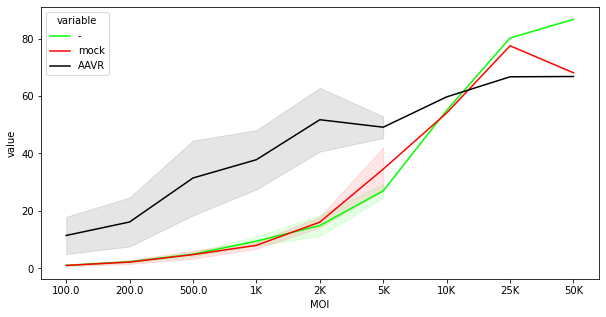

In [35]:
# make the line plot with mean and filled area between the standard deviation
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.lineplot(x="MOI", y="value", hue="variable", data=df, ci="sd", ax=ax, legend=True)
# get the artists that represent the standard deviation fill
artists = g.collections
# set the opacity (alpha) of the fill
for a in artists:
    a.set_alpha(alpha=alpha_of_sds)

# save the figure as pdf
plt.savefig('filled-in-line-plot.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [36]:
a.get_alpha()

0.1